In [1]:
# import libraries to import, operate and visualize the data.

import pandas as pd
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
# loading the Transactions and Customer Demographics data from Transactions_cleaned and Customer_Demographic_cleaned sheets CSV files respectively.

trans = pd.read_csv("Transactions_cleaned.csv")
cust = pd.read_csv("Customer_Demographic_cleaned.csv")

In [3]:
# checking first 5 rows using .head() from Transactions_cleaned Data.

trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [4]:
print("Total rows(records) in the Transaction Dataset : {}".format(trans.shape[0]))
print("Total columns(features) in the Transactions Dataset : {}".format(trans.shape[1]))

Total rows(records) in the Transaction Dataset : 19803
Total columns(features) in the Transactions Dataset : 14


In [5]:
# checking first 5 rows using .head() from Customer_Demographic_Cleaned Data.

cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,61
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46


In [6]:
print("Total rows(records) in the Customer demographic Dataset : {}".format(cust.shape[0]))
print("Total columns(features) in the Customer demographic Dataset : {}".format(cust.shape[1]))

Total rows(records) in the Customer demographic Dataset : 3912
Total columns(features) in the Customer demographic Dataset : 13


In [7]:
# Merge Transactions and Customer Demographics dataset on customer_id.

merged_trans_cust = pd.merge(trans, cust, left_on='customer_id', right_on= 'customer_id', how= 'inner')

In [8]:
merged_trans_cust.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44


In [9]:
print("Total rows(records) in the merged dataset : {}".format(merged_trans_cust.shape[0]))
print("Total columns(features) in the merged dataset : {}".format(merged_trans_cust.shape[1]))

Total rows(records) in the merged dataset : 19354
Total columns(features) in the merged dataset : 26


In [10]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

We see that the data type of transaction_date column is not in date-time format. So the datatype of the column should be changed to date-time format.

In [11]:
merged_trans_cust['transaction_date'] = pd.to_datetime(merged_trans_cust['transaction_date'])

Now we do RFM Analysis for the dataset.

# 1. RFM Analysis

RFM stands for Recency, frequency and Monetary. RFM is a behavious based approach to group customers into segments.
It groups the customers based on their previous purchase transactions. How recently, how often and how much did a customer purchase. RFM filters customers into various groups for a better service purpose. There is a customer segment who is big spender but if they have purchased only once or how recently did they purchase? How often do they buy our product or service?
It also helps the marketing team to run an effective promotional campaign for personalized service.



*   Recency: Who purchased recently? Number of days since the last purchase(Least Receny)
*   Frequency: Who purchased frequently? Total number of purchases by a customer(High Frequency)
*   Monetary Value: Who have a high purchasing amount? Means the total money customer spent(High Monetary Value)





In [12]:
# checking for the latest transaction date or maximum transaction date using max function

max_trans_date = max(merged_trans_cust['transaction_date']).date()

max_trans_date

datetime.date(2017, 12, 30)

In [13]:
# Taking the last transaction date as reference for comparison to find the number of days between a transaction date and last transaction date

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [14]:
#Create a RFM table that will contain all the values for Recency, Frequeny and Monetary data.

rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date:(comparison_date-date.max()), 'product_id' : lambda prod_id: len(prod_id), 'Profit': lambda p : sum(p)})

#without using lambda function we can do the same by using a combination of named functions and the .agg() method.
'''def date_diff(date_series):
    return comparison_date - date_series.max()

def count_products(prod_id_series):
    return len(prod_id_series)

def sum_profit(profit_series):
    return profit_series.sum()

aggregations = {
    'transaction_date': date_diff,
    'product_id': count_products,
    'Profit': sum_profit
}

rfm_table = merged_trans_cust.groupby('customer_id').agg(aggregations)'''

"def date_diff(date_series):\n    return comparison_date - date_series.max()\n\ndef count_products(prod_id_series):\n    return len(prod_id_series)\n\ndef sum_profit(profit_series):\n    return profit_series.sum()\n\naggregations = {\n    'transaction_date': date_diff,\n    'product_id': count_products,\n    'Profit': sum_profit\n}\n\nrfm_table = merged_trans_cust.groupby('customer_id').agg(aggregations)"

In [15]:
# Columns in rfm_table dataframe are not properly named. We need to rename those columns to appropriate names

rfm_table.columns

Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [16]:
# Renaming column names to appropriate names

rfm_table.rename(columns= { 'transaction_date': 'recency',
                           'product_id': 'frequency',
                            'Profit' : 'monetary'}, inplace= True)

In [17]:
#Now dividing the recency, frequency and monetary into 4 quartiles(min, 25%, 50%, 75% and max).

#These values will help us calculate RFM score for a customer and classify based on their RFM score.

# Create quartile bins for each column
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
#In first line of code, labels are assigned in reverse order, indicating that higher quartiles have lower labels.
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1', '2', '3', '4'])
#In second and third line of code, labels are assigned in ascending order, indicating that higher quartiles have higher labels.
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1', '2', '3', '4'])

In [18]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7 days,11,3018.09,4,4,3
2,128 days,3,2226.26,1,1,2
3,102 days,8,3362.81,1,4,3
4,195 days,2,220.57,1,1,1
5,16 days,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256 days,4,2045.84,1,1,2
3497,52 days,3,1648.32,2,1,1
3498,127 days,6,3147.33,1,2,3


In [19]:
# Now calculating the RFM score.
# Max weightage is given in order of receny then frequency and then monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [20]:
#Assign a title to each customer. Platinum is the highest range of RFM score down to Bronze as lowest range of RFM score.

rfm_table['customer_title']= pd.qcut(rfm_table['rfm_score'], 4 , ['Bronze', 'Silver', 'Gold', 'Platinum'])

In [21]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7 days,11,3018.09,4,4,3,443,Platinum
2,128 days,3,2226.26,1,1,2,112,Bronze
3,102 days,8,3362.81,1,4,3,143,Bronze
4,195 days,2,220.57,1,1,1,111,Bronze
5,16 days,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256 days,4,2045.84,1,1,2,112,Bronze
3497,52 days,3,1648.32,2,1,1,211,Bronze
3498,127 days,6,3147.33,1,2,3,123,Bronze


We have the final RFM table with all the required information. We will now merge both RFM table with Transaction and Customer_demographics tables.
The two dataframe rfm_table and Transactions and customer_demographics are merged, to get a deeper insight of customer segments along with transactions.
Customer_id will be used as base of joining these dataselts.

In [22]:
#joining the two datasets using inner joint based on customer_id in both the datasets.

cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on= 'customer_id', right_on= 'customer_id', how= 'inner')

In [23]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   transaction_id                       19354 non-null  int64          
 1   product_id                           19354 non-null  int64          
 2   customer_id                          19354 non-null  int64          
 3   transaction_date                     19354 non-null  datetime64[ns] 
 4   online_order                         19354 non-null  float64        
 5   order_status                         19354 non-null  object         
 6   brand                                19354 non-null  object         
 7   product_line                         19354 non-null  object         
 8   product_class                        19354 non-null  object         
 9   product_size                         19354 non-null  object         
 10

Datatypes look fine for the columns.

# Create an Age Group feature:

In [56]:
#Column name Age_group is created in dataset Cust_trans_rfm using math and lambda function and group age by a multiple of 10.

cust_trans_rfm['age_group'] = cust_trans_rfm['age'].apply(lambda x: (math.floor(x/10)+1)*10)


# or following without using math and lambda function

#cust_trans_rfm['Age_group'] = (cust_trans_rfm['age'] // 10 + 1) * 10

In [57]:
cust_trans_rfm.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,Age_group,detail_cust_title,rank,age_group
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9,70
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9,70
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9,70
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,4179.11,3,3,4,334,Gold,50,Potential Customer,5,50
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,4179.11,3,3,4,334,Gold,50,Potential Customer,5,50


# Create a detail customer title/tag based on RFM score:
Now a detailed extended version of customer title will be created to divide the customers list into 11 groups. The list will be as follows: Platinum, Very loyal, Becoming loyal, recent customer, Potential customer, late bloomer, losing customer, High risk customer, Almost lost customer, Evasive customer and lost customer.
That will be achieved by demarking customers into above mentioned groups based on their RFM score.

In [58]:
# Creating a function to look for appropriate customer title based on RFM score.

def cust_score_title_lookup(cols):
  rfm_score= cols[0]

  if rfm_score >= 444:
    return 'Platinum_customer'
  elif rfm_score >= 433:
    return 'Very Loyal'
  elif rfm_score >= 421:
    return 'Becoming Loyal'
  elif rfm_score >= 344:
    return 'Recent Customer'
  elif rfm_score >= 323:
    return 'Potential Customer'
  elif rfm_score >= 311:
    return 'Late Bloomer'
  elif rfm_score >= 224:
    return 'Losing Customer'
  elif rfm_score >= 212:
    return 'High Risk Customer'
  elif rfm_score >= 124:
    return 'Almost Lost Customer'
  elif rfm_score >= 112:
    return 'Evasive Customer'
  else:
    return 'Lost Customer'

In [59]:
# Now applying the above function and creating a new feature column 'detail_cust_title' in the dataset


cust_trans_rfm['detail_cust_title']= cust_trans_rfm[['rfm_score']].apply(cust_score_title_lookup, axis= 1)

In the code above:


*   Note that double brackets **[[**'rfm_score'**]]** are used to ensure that the extracted data remains a DataFrame rather than a Series
*   ".apply(cust_score_title_lookup, axis=1)" applies the function 'cust_score_title_lookup' to each row of the 'rfm_score' column. The **axis=1** parameter indicates that the function should be applied **row-wise**.



In [60]:
# now providing a rank to the customer based on their title using a new function.

def get_rank(cols):
  title= cols[0]

  if title == 'Platinum_customer':
    return 1
  elif title == 'Very Loyal':
    return 2
  elif title == 'Becoming Loyal':
    return 3
  elif title == 'Recent Customer':
    return 4
  elif title == 'Potential Customer':
    return 5
  elif title == 'Late Bloomer':
    return 6
  elif title == 'Losing Customer':
    return 7
  elif title == 'High Risk Customer':
    return 8
  elif title == 'Almost Lost Customer':
    return 9
  elif title == 'Evasive Customer':
    return 10
  else:
    return 11

In [61]:
# Use the above created function to create a new feature column called rank.

cust_trans_rfm['rank'] = cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis= 1)

In the code above:


*   Note that double brackets **[[**'detail_cust_title'**]]** are used to ensure that the extracted data remains a DataFrame rather than a Series

*   ".apply(get_rank, axis= 1)" applies the function 'get_rank' to each row of the 'detail_cust_title' column. The **axis=1** parameter indicates that the function should be applied **row-wise**.




# Export the dataset to CSV file:
DQA ( Data Quality Assessment), data cleaning and RFM analysis is performed on the dataset.
Now is the time to export the dataset to a csv file for further **EDA (Exploratory Data Analysis)**. This data will be used to drive the **Sales customer segmentation Dashboard** in Visualization tool.

In [62]:
cust_trans_rfm.to_csv("Customer_Trans_RFM_Analysis.csv", index= False)

In [63]:
print("Total records in the final dataset : {}".format(cust_trans_rfm.shape[0]))

Total records in the final dataset : 19354


## Data Analysis and Exploration
1. New Customer vs Old Customer age distributions

In [64]:
new_cust= pd.read_csv('New_Customer_List_cleaned.csv')

<ipython-input-65-825c34506631>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['age_group'], kde= False, bins= 15)


Text(0.5, 1.0, 'New customers - Age distribution')

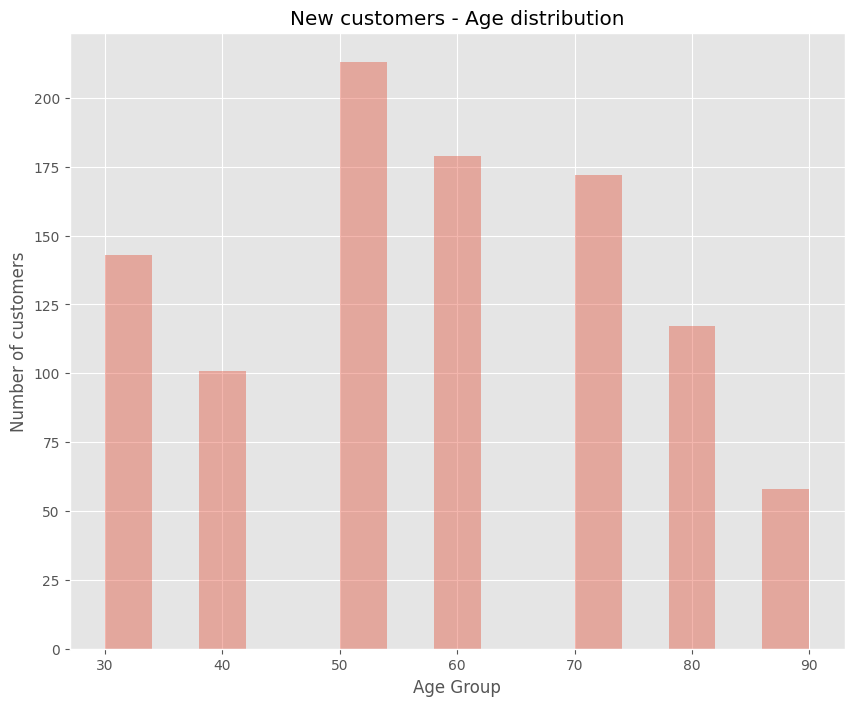

In [65]:
plt.figure(figsize=(10,8))
sns.distplot(new_cust['age_group'], kde= False, bins= 15)
plt.xlabel('Age Group')
plt.ylabel('Number of customers')
plt.title('New customers - Age distribution')

Here 30 = under 30 and 40 = 30-39 age bracket.

<ipython-input-67-6babcf86c569>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_trans_rfm['age_group'], kde= False, bins= 15)


Text(0.5, 1.0, 'Old Customers - Age Distribution')

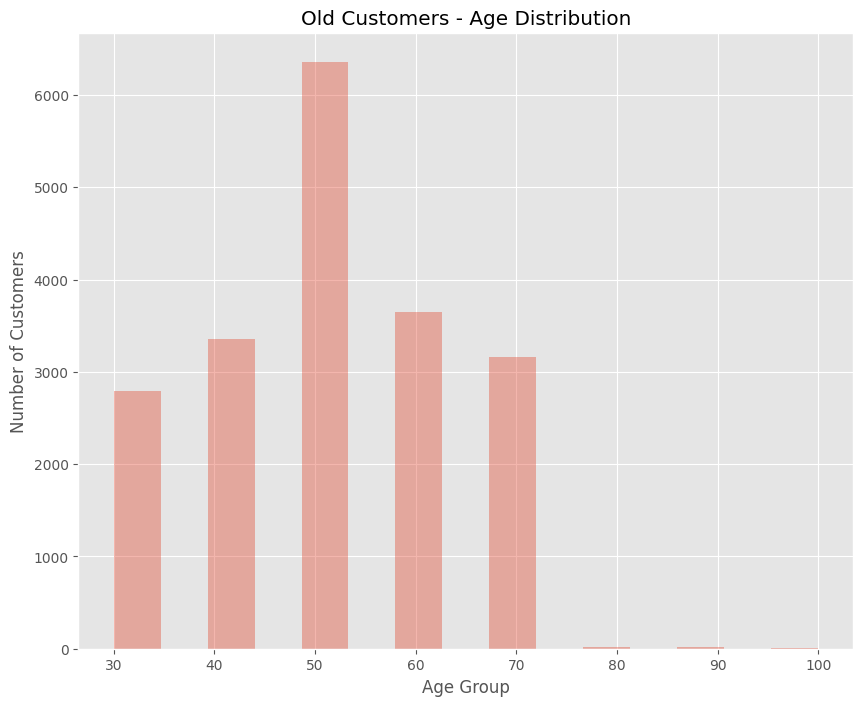

In [67]:
plt.figure(figsize=(10,8))
sns.distplot(cust_trans_rfm['age_group'], kde= False, bins= 15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

Here 30 = under 30 and 40 = 30-39 age bracket.


As per the graph we can see that:


*   Most new/old customers are aged between 40-49.
*   The lowest age groups are 70+ for old and 80+ for new customer dataset.
*   Among the New customers the most populated age bracket is 50-59 and 60-69, while the maximum Old customers are from the age bracket 50-69.
*   There is a steep drop in number of 30-39 age group among the New customers.



# Bike related purchases over last 3 years by gender

In [68]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()

In [70]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [71]:
cust_bike_purchase_by_gender['percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']/total_records)*100

In [72]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


Over the last 3 years approximately 51% of the buyers are women and 49% were male buyers.
Female purchases are approximately 10,000 more than male(numerically). Genderwise majority of the bike sales comes from female customers.

Text(0.5, 1.0, 'Female vs Male past 3 years bike purchases')

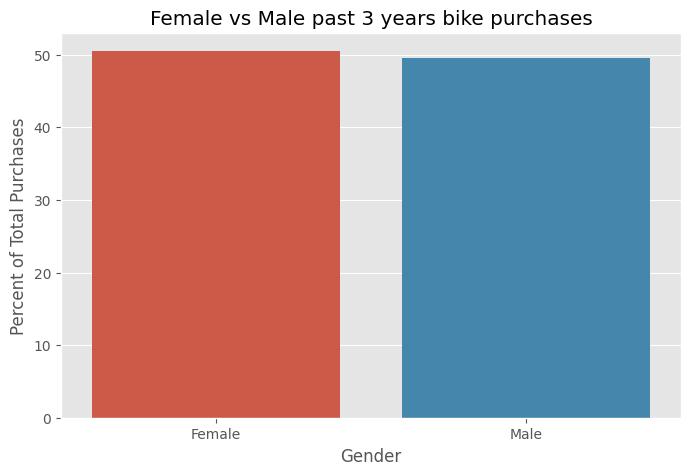

In [112]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y= 'percent_of_total', data= cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike Purchases')

# Job Industry Cusotmer Distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Manufacturing'),
  Text(1, 0, 'Property'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'IT'),
  Text(6, 0, 'Telecommunications'),
  Text(7, 0, 'Health'),
  Text(8, 0, 'Argiculture')])

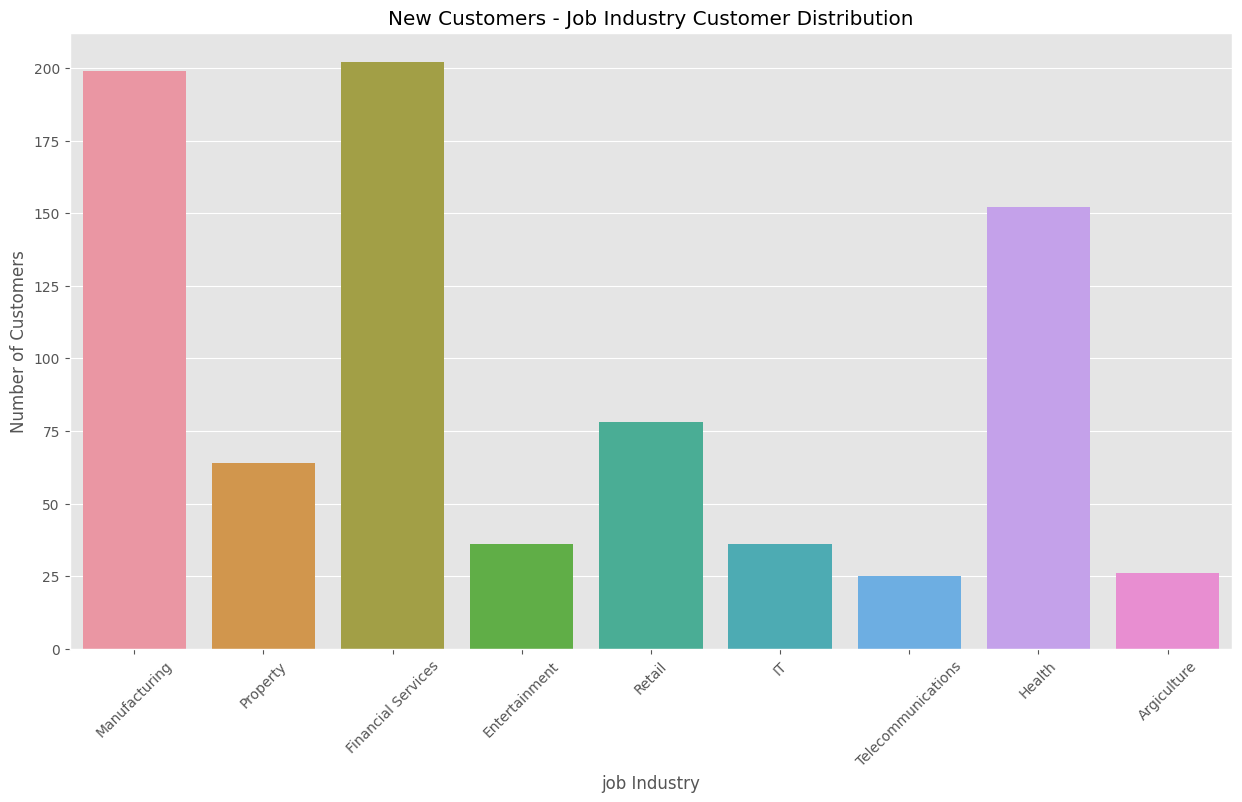

In [74]:
plt.figure(figsize= (15,8))
sns.countplot(x='job_industry_category', data= new_cust[new_cust['job_industry_category']!='Missing'])
plt.xlabel('job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')
plt.xticks(rotation=45)

Among the **New Customers** the highest amount of sales comes from customers having a job in Manufacturing and Financial services sector. The samllest chunk of sales comes from customers in Agriculture sector and from Telecom sector with 3% sales only. Similar trend is observed among **Old Customers**.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Financial Services'),
  Text(1, 0, 'Health'),
  Text(2, 0, 'Retail'),
  Text(3, 0, 'Property'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Entertainment'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'Argiculture'),
  Text(8, 0, 'Telecommunications')])

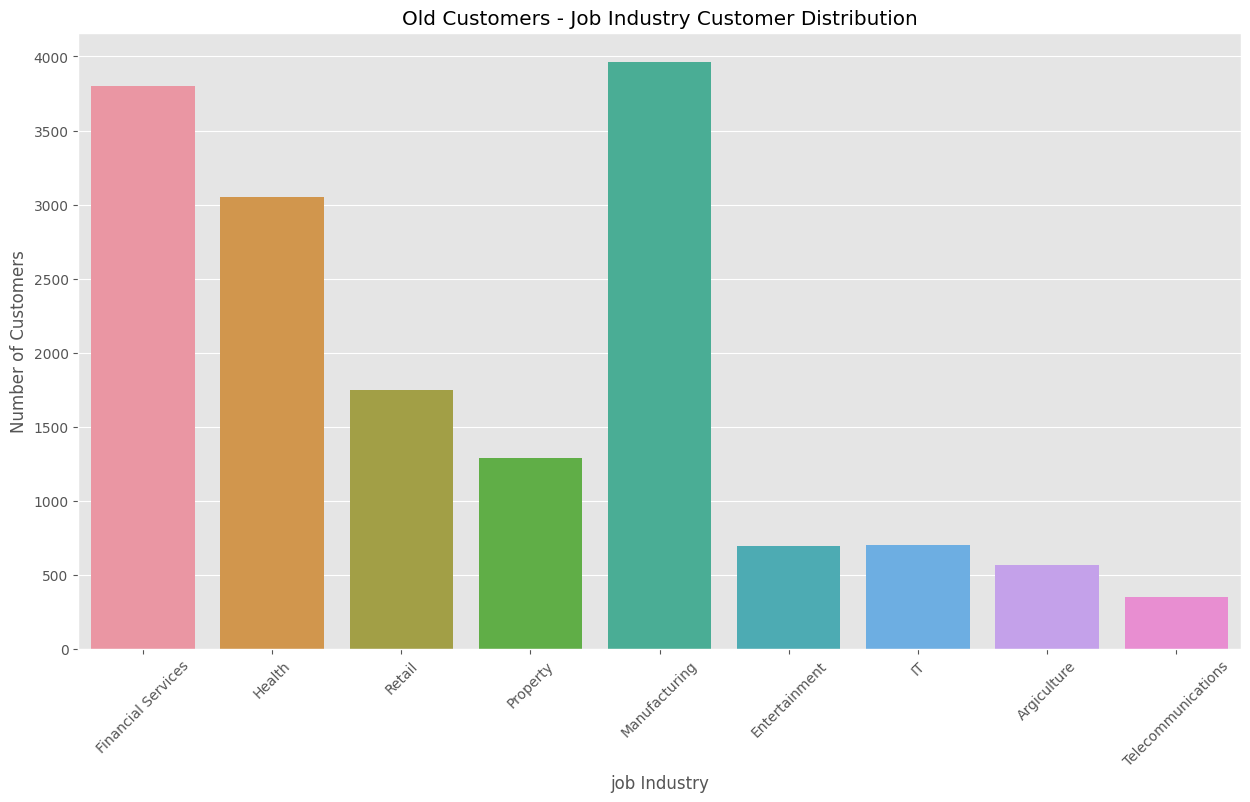

In [75]:
plt.figure(figsize= (15,8))
sns.countplot(x='job_industry_category', data= cust_trans_rfm[cust_trans_rfm['job_industry_category']!='Missing'])
plt.xlabel('job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')
plt.xticks(rotation=45)

#Wealth Segmentation by Age Group

**New Customers**

In [76]:
Wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'age_group']).size().reset_index()

In [77]:
Wealth_age_seg_new.rename(columns= {0 : 'number_of_customers'}, inplace=True)
Wealth_age_seg_new

,wealth_segment,age_group,number_of_customers
0,Affluent Customer,30,46
1,Affluent Customer,40,15
2,Affluent Customer,50,53
3,Affluent Customer,60,44
4,Affluent Customer,70,35
5,Affluent Customer,80,30
6,Affluent Customer,90,12
7,High Net Worth,30,32
8,High Net Worth,40,34
9,High Net Worth,50,52


Across all Age Groups the maximum number of customers are classified as 'Mass Customers'. The next being 'High Net Worth'. However among 40-49 aged customers 'Affluent Customers' outperforms the 'High Net Worth' customers.

Text(0.5, 1.0, 'New Customers - Wealth Segmentation by Age Group')

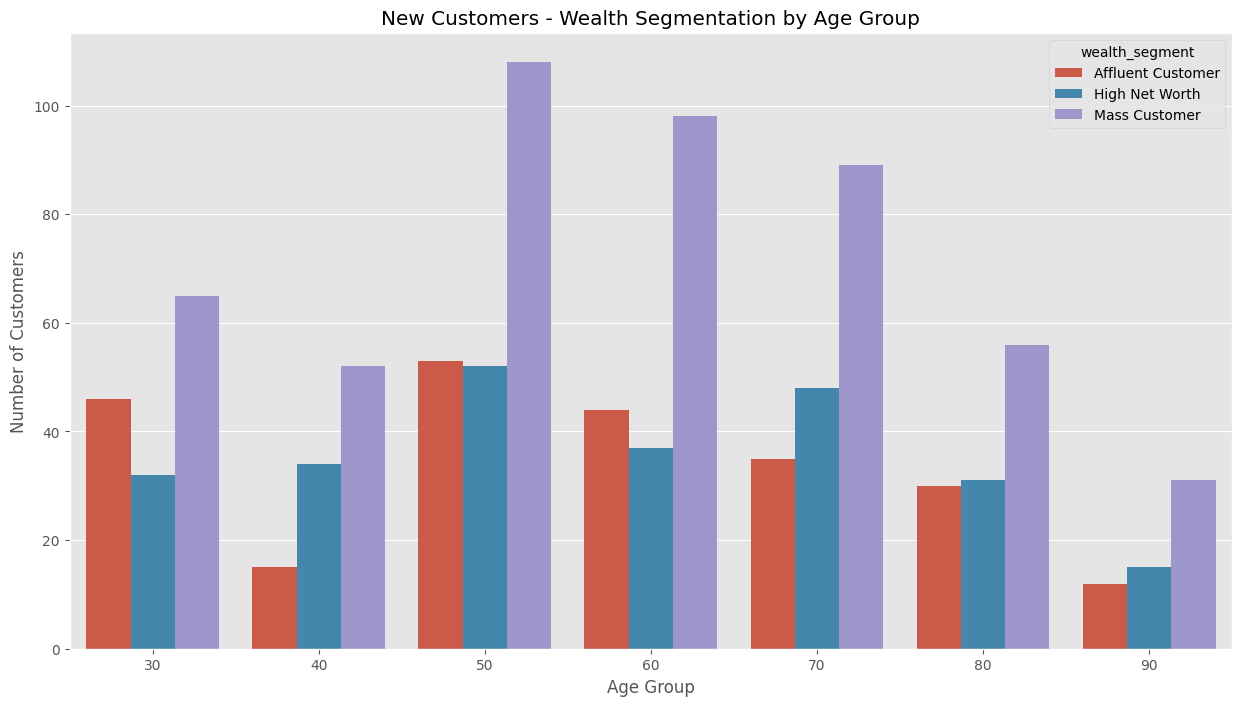

In [83]:
plt.figure(figsize= (15,8))
sns.barplot(x='age_group', y= 'number_of_customers', hue= 'wealth_segment', data= Wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')

In all the age groups the most number of customers are 'Mass Customers'. The 2nd largest customer base being the 'High Net Worth' group.
In the age group 40-49 the 'Affluent Customer' group outperforms 'High Net Worth' group

**Old Customers**

Similar trend( like that of New Customers) is observed among Old Customers

In [79]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'age_group']).size().reset_index()

In [80]:
wealth_age_seg_old.rename(columns= {0: 'number_of_customers'}, inplace= True)

Text(0.5, 1.0, 'Old Customers - Wealth Segmentation by Age Group')

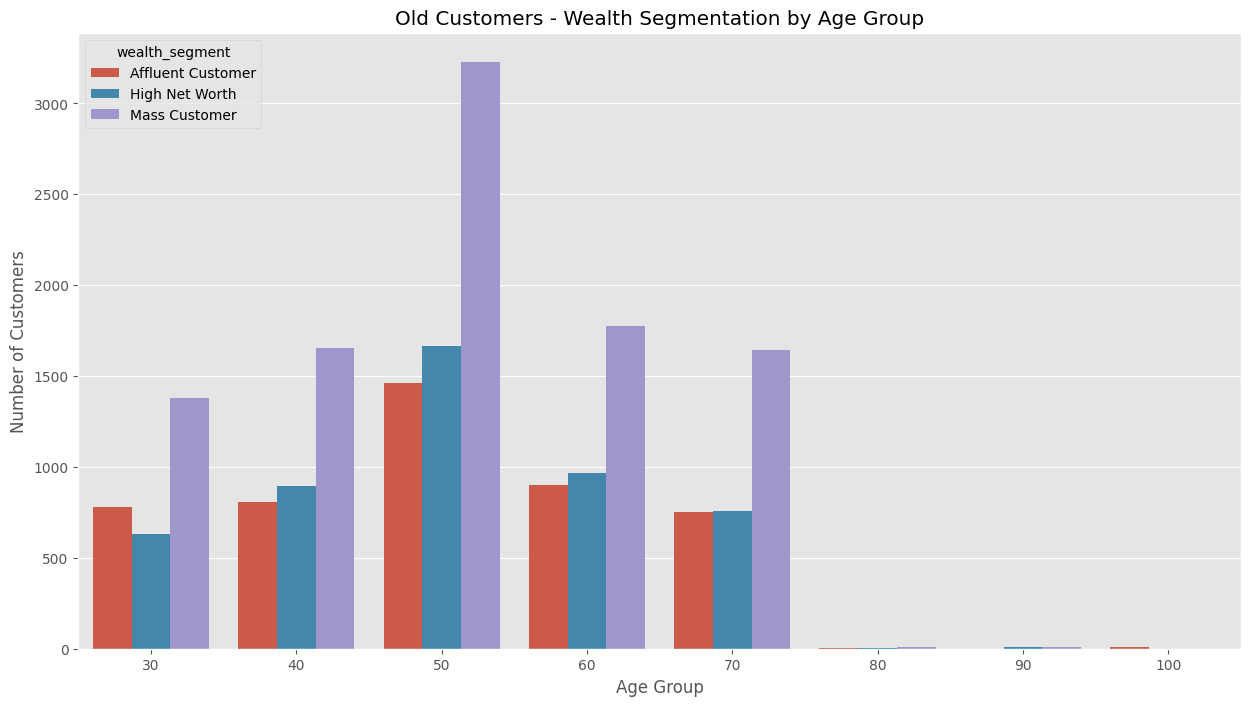

In [82]:
plt.figure(figsize= (15,8))
sns.barplot(x= 'age_group', y= 'number_of_customers', hue= 'wealth_segment', data= wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')

# Car Owner across each State

In [85]:
# Loading the customer address dataset:

cust_addr_info= pd.read_csv('Customer_Address_cleaned.csv')

In [86]:
# Merging the RFM data with Customer Address Dataset.

cust_trans_addr= pd.merge(cust_trans_rfm, cust_addr_info, left_on = 'customer_id', right_on= 'customer_id', how= 'inner')

In [87]:
print("RFM table records count : {}".format(cust_trans_rfm.shape[0]))
print("Address table records count : {}".format(cust_addr_info.shape[0]))

RFM table records count : 19354
Address table records count : 3999


In [89]:
state_car_owners = cust_trans_addr[['state', 'owns_car', 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [90]:
state_car_owners.rename(columns= {0: 'number_of_customers'}, inplace= True)
state_car_owners

,state,owns_car,number_of_customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria, Australia.
In New South Wales (NSW) it seems there is a greater amount of people who donot own a car. In Victoria (VIC) the proportion is evenly split. However in Queensland (QLD) there are relatively more people who own the car.

Text(0.5, 1.0, 'Number of Customers who own a car')

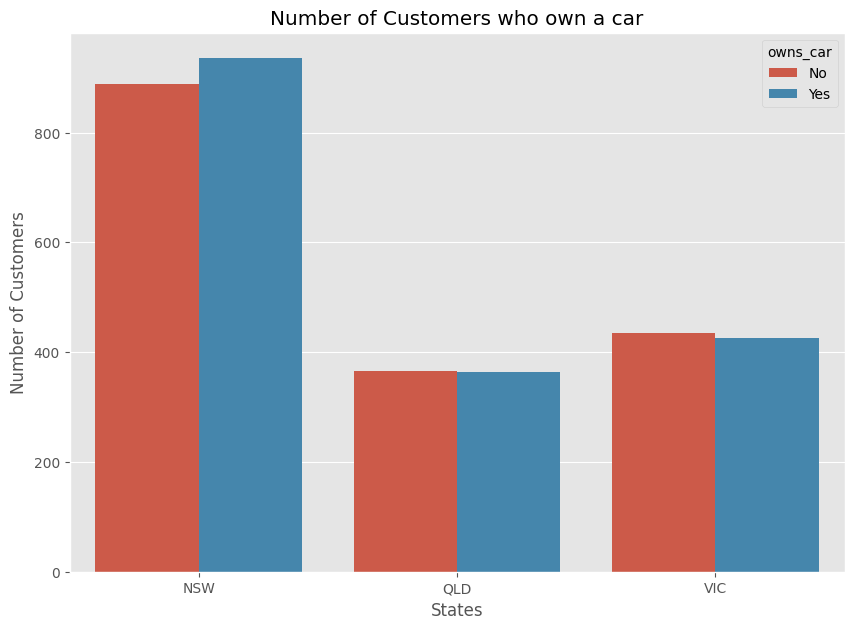

In [93]:
plt.figure(figsize=(10,7))
sns.barplot(x= 'state', y= 'number_of_customers', hue= 'owns_car', data= state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')

NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states. In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW

#RFM Analysis Scatter Plots

**Recency vs Monetary**

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

Text(0.5, 1.0, 'Recency vs Monetary')

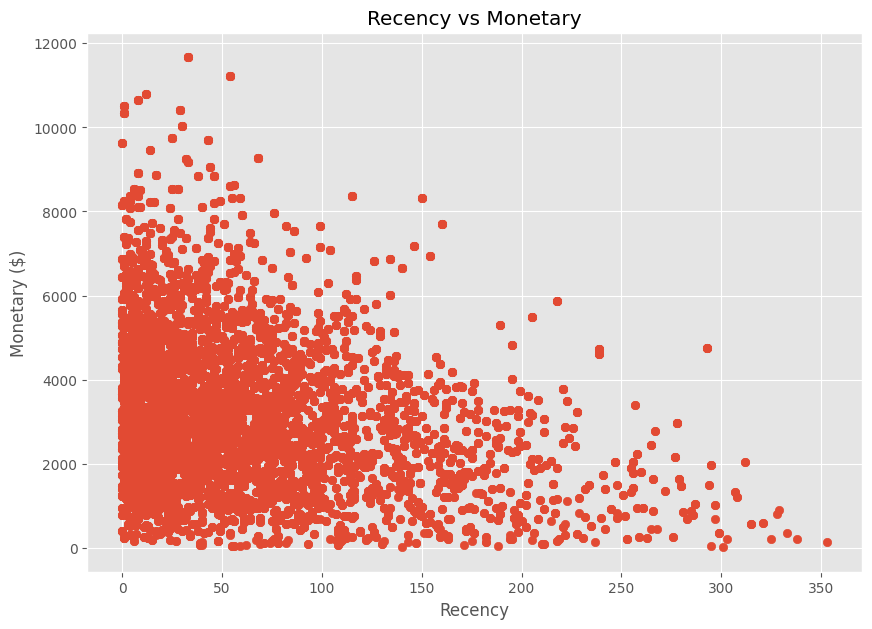

In [104]:
#There is an issue with the data type of the 'recency' and 'monetary' columns in cust_trans_rfm DataFrame.
#To resolve this issue, converting the 'recency' column to numeric days or another compatible format that can be plotted.

cust_trans_rfm['recency_days'] = cust_trans_rfm['recency'].dt.days

#Now converted the 'recency' values to a compatible numeric data type, a scatter plot can be created.

plt.figure(figsize=(10, 7))
plt.scatter(x=cust_trans_rfm['recency_days'], y=cust_trans_rfm['monetary'])
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')

**Frequency vs Monetary**

Text(0.5, 1.0, 'Frequency vs Monetary')

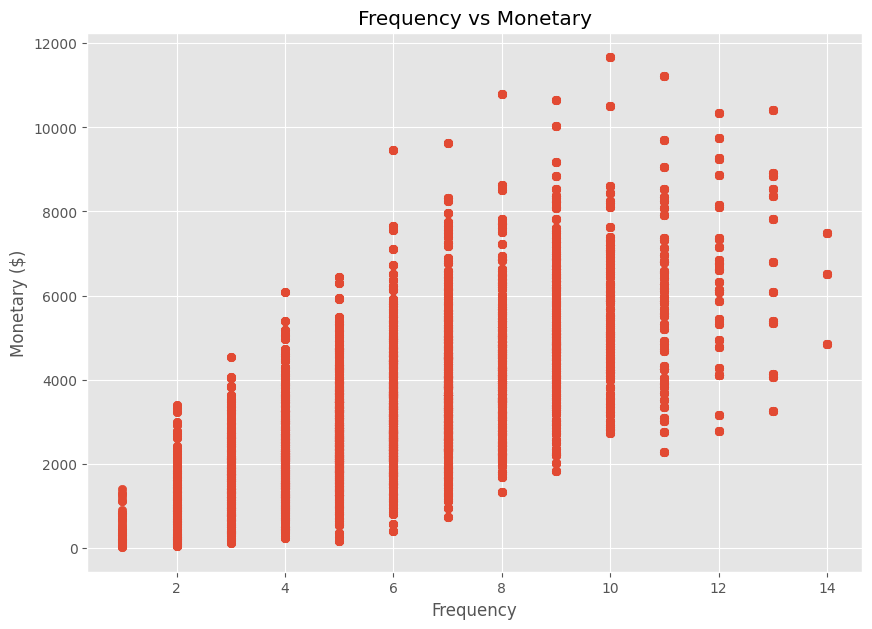

In [107]:
plt.figure(figsize=(10,7))
plt.scatter(x=cust_trans_rfm['frequency'], y= cust_trans_rfm['monetary'])
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')

Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business.

#Customer Segment Distribution

Finally the number of customers present under a customer segment can be plotted

In [109]:
#Calculating the number of unique customers under a customer title.

cust_per_title = (cust_trans_rfm[['detail_cust_title', 'customer_id', 'rank']]
                  .drop_duplicates()
                  .groupby(['detail_cust_title', 'rank'])
                  .size()
                  .reset_index()
                  .sort_values('rank'))

In [110]:
cust_per_title.rename(columns= {0 : 'number_of_customers'}, inplace= True)
cust_per_title

,detail_cust_title,rank,number_of_customers
7,Platinum_customer,1,164
10,Very Loyal,2,181
1,Becoming Loyal,3,344
9,Recent Customer,4,357
8,Potential Customer,5,340
4,Late Bloomer,6,332
5,Losing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388


Text(0.5, 1.0, 'Number of Customers by Customer Segment')

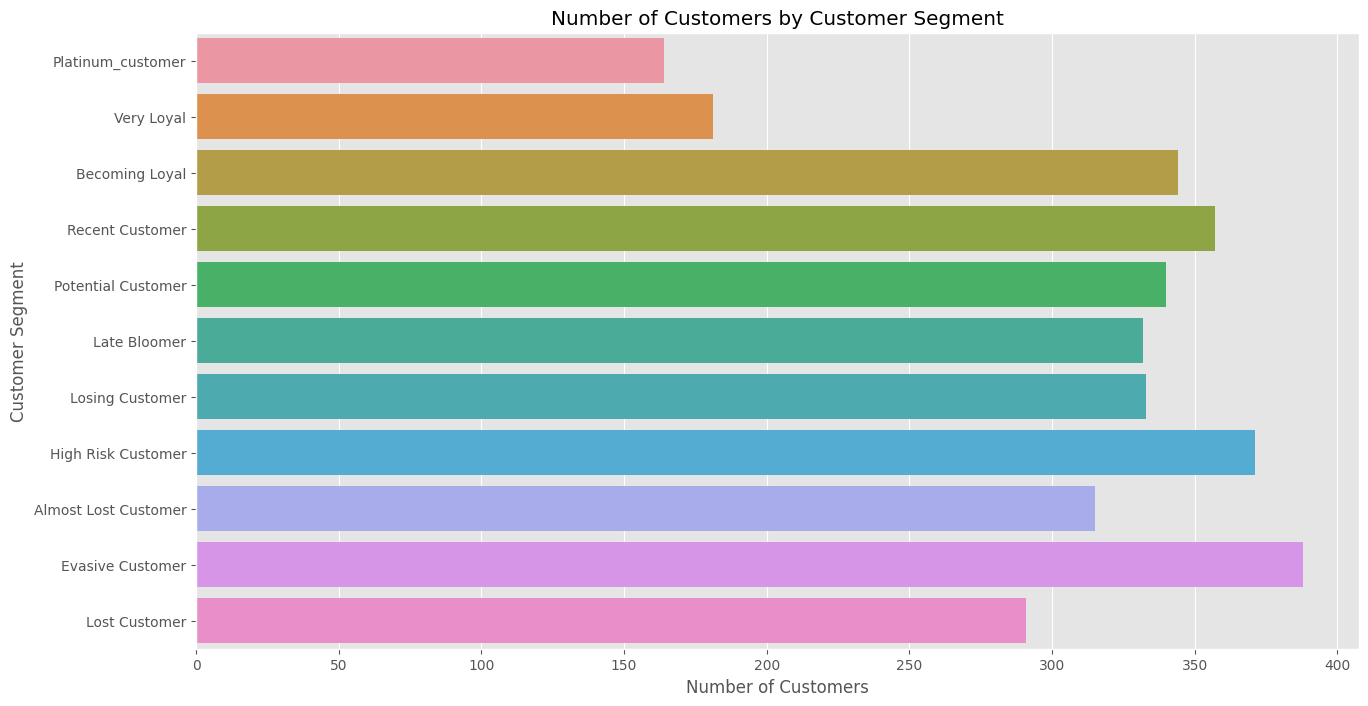

In [111]:
#Plot the number of customers

plt.figure(figsize= (15,8))
sns.barplot(data= cust_per_title, x= 'number_of_customers', y= 'detail_cust_title')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')